In [2]:
import xarray as xr
import rioxarray
from dea_tools.datahandling import mostcommon_crs, load_ard, xr_pansharpen

ImportError: cannot import name 'xr_pansharpen' from 'dea_tools.datahandling' (c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\dea_tools\datahandling.py)

In [2]:
multispectral_data = rioxarray.open_rasterio(r"D:\Imagenes Satelitales\2013\6741387101\IMG_PHR1A_MS_002\IMG_PHR1A_MS_201302051412270_ORT_6741387101-2_R1C1.TIF")
panchromatic_data = rioxarray.open_rasterio(r"D:\Imagenes Satelitales\2013\6741387101\IMG_PHR1A_P_001\IMG_PHR1A_P_201302051412270_ORT_6741387101-1_R1C1.TIF")

------------------> It's getting hard to stack panchromatic to ms. What about pansharpening those images?

In [48]:
import cv2
# Check: 

height, width = multispectral_data.shape[1:3]

img_resize=cv2.resize(multispectral_data, None, fx=panchromatic_data.shape[1]/width, fy=panchromatic_data.shape[0]/height, interpolation=cv2.INTER_LINEAR)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [28]:
import xarray as xr
import numpy as np
from scipy.ndimage import zoom

# Get the scaling factor for resizing
scale = 2

# Get the original shape before resizing
original_shape = multispectral_data.shape

# Rescale the data using scipy.ndimage.zoom
zoomed_data = zoom(multispectral_data.values, (1, scale, scale), order=0)

# Create a new xarray DataArray with the zoomed data
resized_multispectral_data = xr.DataArray(
    data=zoomed_data,
    dims=('band', 'y', 'x'),
    coords={'band': multispectral_data.band,
            'y': np.arange(original_shape[1] * scale),
            'x': np.arange(original_shape[2] * scale)},
    attrs={'spatial_ref': multispectral_data.spatial_ref}
)

# # Update the spatial_ref attribute to match the new dimensions
# resized_multispectral_data.attrs['spatial_ref'] = resized_multispectral_data.spatial_ref.replace(
#     resolution=resized_multispectral_data.spatial_ref.resolution / scale
# )


In [40]:
multispectral_data.x

<xarray.DataArray 'x' (x: 7680)>
array([-58.43513 , -58.435111, -58.435093, ..., -58.292963, -58.292944,
       -58.292926])
Coordinates:
  * x            (x) float64 -58.44 -58.44 -58.44 ... -58.29 -58.29 -58.29
    spatial_ref  int32 0

In [44]:
multispectral_data.x

<xarray.DataArray 'x' (x: 7680)>
array([-58.43513 , -58.435111, -58.435093, ..., -58.292963, -58.292944,
       -58.292926])
Coordinates:
  * x            (x) float64 -58.44 -58.44 -58.44 ... -58.29 -58.29 -58.29
    spatial_ref  int32 0

In [43]:
panchromatic_data.x

<xarray.DataArray 'x' (x: 30720)>
array([-58.435144, -58.435139, -58.435134, ..., -58.292935, -58.292931,
       -58.292926])
Coordinates:
  * x            (x) float64 -58.44 -58.44 -58.44 ... -58.29 -58.29 -58.29
    spatial_ref  int32 0

In [42]:
incomp_arr = multispectral_data.x

avg_arr = ((incomp_arr + np.roll(incomp_arr, -1))/2.0)
# array([1.5, 2.5, 3.5, 5. , 3. , 0.5])

np.vstack([incomp_arr, avg_arr]).flatten('F')[:-1]
# array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 5. , 6. , 3. , 0. ])


array([-58.43512963, -58.43512037, -58.43511111, ..., -58.29294444,
       -58.29293519, -58.29292593])

In [38]:
import scipy
scipy.interpolate.interp1d()
(multispectral_data.x)

TypeError: interp() missing 2 required positional arguments: 'xp' and 'fp'

In [21]:
multispectral_data

<xarray.DataArray (band: 4, y: 7680, x: 7680)>
array([[[1294, 1258, ...,    0,    0],
        [1306, 1287, ...,    0,    0],
        ...,
        [ 893,  915, ...,  461,  473],
        [ 859,  874, ...,  425,  495]],

       [[1120, 1095, ...,    0,    0],
        [1134, 1127, ...,    0,    0],
        ...,
        [1070, 1060, ...,  632,  659],
        [1048, 1043, ...,  607,  694]],

       [[ 822,  794, ...,    0,    0],
        [ 850,  820, ...,    0,    0],
        ...,
        [ 709,  725, ...,  459,  464],
        [ 690,  699, ...,  459,  480]],

       [[ 586,  560, ...,    0,    0],
        [ 593,  584, ...,    0,    0],
        ...,
        [3720, 3689, ..., 3392, 3408],
        [3798, 3784, ..., 3446, 3710]]], dtype=uint16)
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 -58.44 -58.44 -58.44 ... -58.29 -58.29 -58.29
  * y            (y) float64 -34.53 -34.53 -34.53 ... -34.67 -34.67 -34.67
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:             Area
    TIFFTAG_DATETIME:          2023:07:10T05:10:43
    TIFFTAG_IMAGEDESCRIPTION:  B2 B1 B0 B3
    TIFFTAG_XRESOLUTION:       1
    TIFFTAG_YRESOLUTION:       1
    scale_factor:              1.0
    add_offset:                0.0

In [22]:
zoomed_data

array([[[1294, 1294, 1258, ...,    0,    0,    0],
        [1294, 1294, 1258, ...,    0,    0,    0],
        [1306, 1306, 1287, ...,    0,    0,    0],
        ...,
        [ 893,  893,  915, ...,  461,  473,  473],
        [ 859,  859,  874, ...,  425,  495,  495],
        [ 859,  859,  874, ...,  425,  495,  495]],

       [[1120, 1120, 1095, ...,    0,    0,    0],
        [1120, 1120, 1095, ...,    0,    0,    0],
        [1134, 1134, 1127, ...,    0,    0,    0],
        ...,
        [1070, 1070, 1060, ...,  632,  659,  659],
        [1048, 1048, 1043, ...,  607,  694,  694],
        [1048, 1048, 1043, ...,  607,  694,  694]],

       [[ 822,  822,  794, ...,    0,    0,    0],
        [ 822,  822,  794, ...,    0,    0,    0],
        [ 850,  850,  820, ...,    0,    0,    0],
        ...,
        [ 709,  709,  725, ...,  459,  464,  464],
        [ 690,  690,  699, ...,  459,  480,  480],
        [ 690,  690,  699, ...,  459,  480,  480]],

       [[ 586,  586,  560, ...,    0,

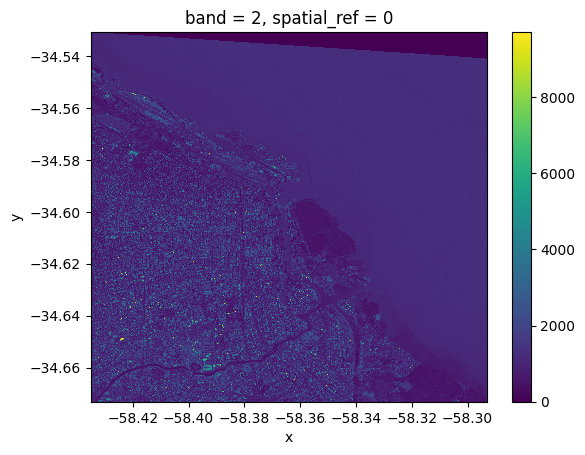

In [7]:
ms[ms.band == 2].squeeze().plot.imshow()

In [16]:
ms.band.values

array([1, 2, 3, 4])

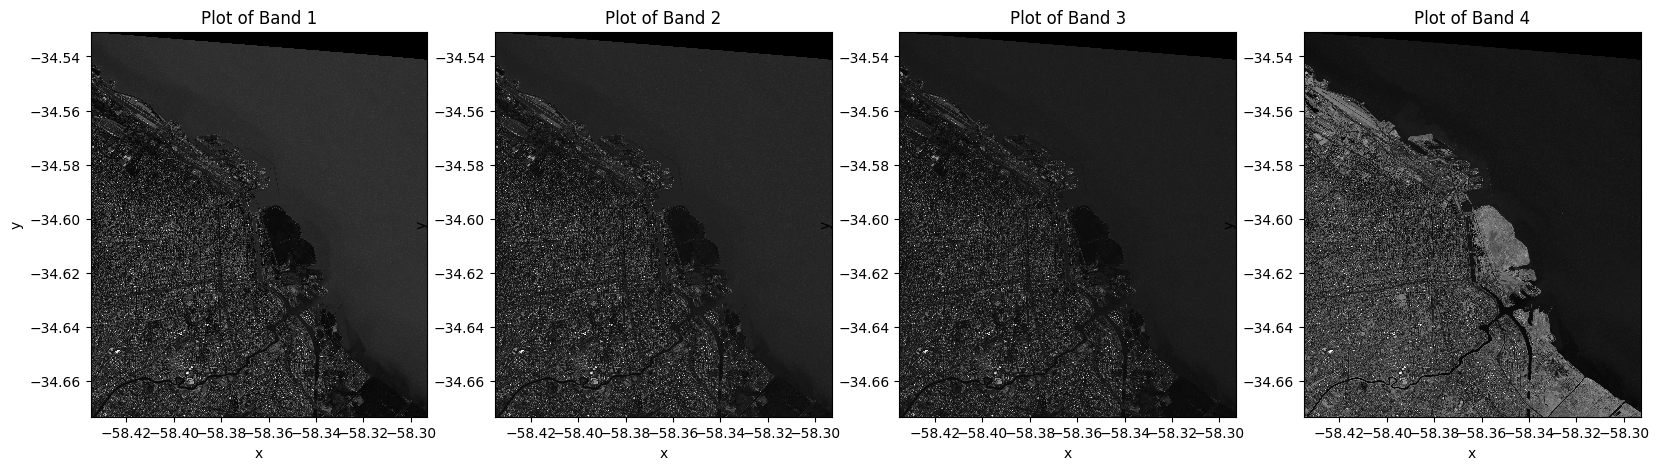

In [25]:
import matplotlib.pyplot as plt 
# Plot the data
f, axs = plt.subplots(1, len(ms.band.values), figsize=(20, 5))
for band in ms.band.values:
    ms[ms.band == band].squeeze().plot.imshow(ax=axs[band - 1],
                    cmap="Greys_r", add_colorbar=False)
    # axs[band-1].set_axis_off()
    axs[band-1].set_title(f"Plot of Band {band}")
plt.show()

In [33]:
ms

<xarray.DataArray (band: 4, y: 7680, x: 7680)>
[235929600 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 -58.44 -58.44 -58.44 ... -58.29 -58.29 -58.29
  * y            (y) float64 -34.53 -34.53 -34.53 ... -34.67 -34.67 -34.67
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:             Area
    TIFFTAG_DATETIME:          2023:07:10T05:10:43
    TIFFTAG_IMAGEDESCRIPTION:  B2 B1 B0 B3
    TIFFTAG_XRESOLUTION:       1
    TIFFTAG_YRESOLUTION:       1
    scale_factor:              1.0
    add_offset:                0.0

TypeError: No numeric data to plot.

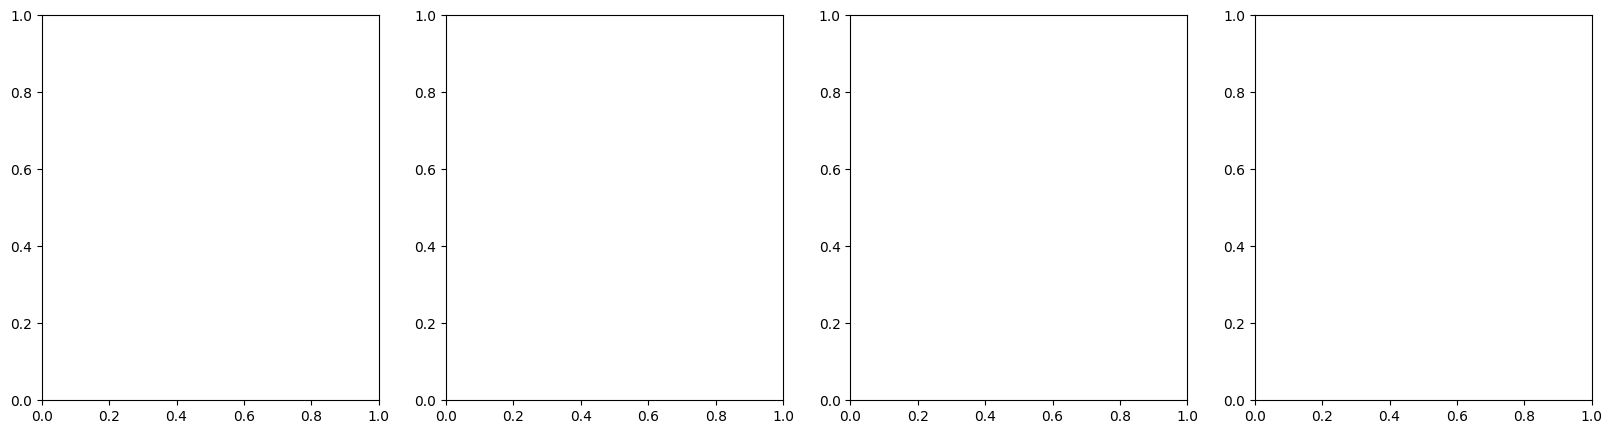

In [32]:
subset = resized_multispectral_data.sel(x=slice(-58.38, -58.375), y=slice(-34.60, -34.605))  

import matplotlib.pyplot as plt 
# Plot the data
f, axs = plt.subplots(1, len(subset.band.values), figsize=(20, 5))
for band in subset.band.values:
    subset[subset.band == band].squeeze().plot.imshow(ax=axs[band - 1],
                    cmap="Greys_r", add_colorbar=False)
    # axs[band-1].set_axis_off()
    axs[band-1].set_title(f"Plot of Band {band}")
plt.show()

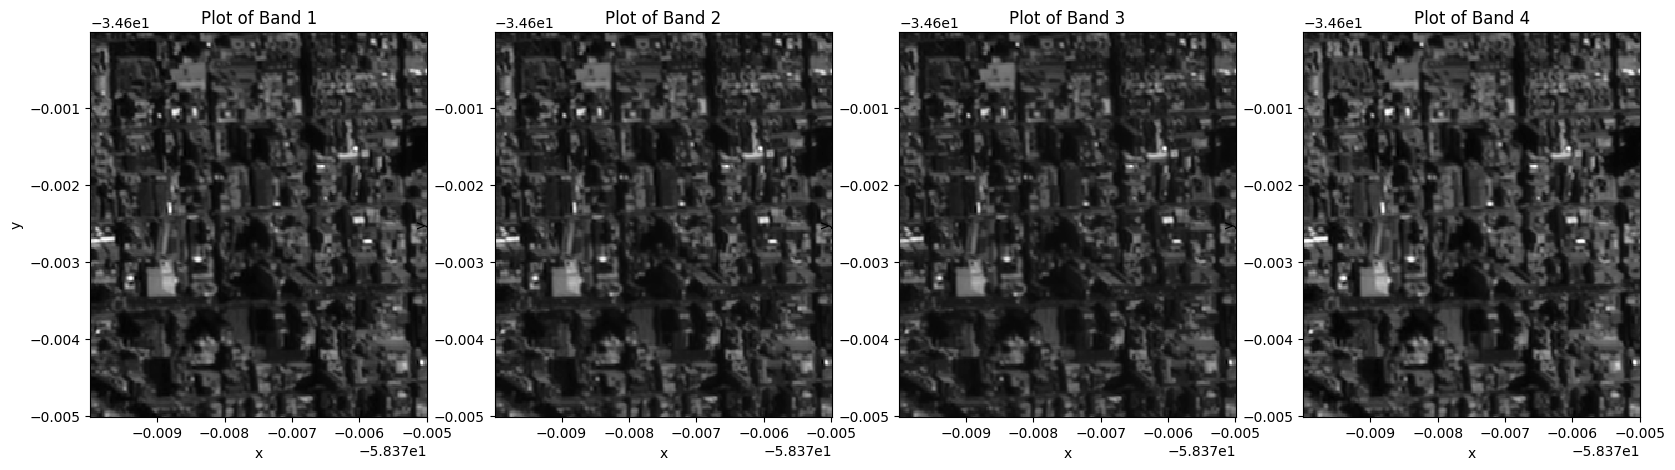

In [46]:
subset = ms.sel(x=slice(-58.38, -58.375), y=slice(-34.60, -34.605))  

import matplotlib.pyplot as plt 
# Plot the data
f, axs = plt.subplots(1, len(subset.band.values), figsize=(20, 5))
for band in subset.band.values:
    subset[subset.band == band].squeeze().plot.imshow(ax=axs[band - 1],
                    cmap="Greys_r", add_colorbar=False)
    # axs[band-1].set_axis_off()
    axs[band-1].set_title(f"Plot of Band {band}")
plt.show()

In [52]:
ms

<xarray.DataArray (band: 4, y: 7680, x: 7680)>
[235929600 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 -58.44 -58.44 -58.44 ... -58.29 -58.29 -58.29
  * y            (y) float64 -34.53 -34.53 -34.53 ... -34.67 -34.67 -34.67
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:             Area
    TIFFTAG_DATETIME:          2023:07:10T05:10:43
    TIFFTAG_IMAGEDESCRIPTION:  B2 B1 B0 B3
    TIFFTAG_XRESOLUTION:       1
    TIFFTAG_YRESOLUTION:       1
    scale_factor:              1.0
    add_offset:                0.0

In [ ]:
from skimage.transform import resize

# Get the dimensions of the multispectral image
target_height, target_width = multispectral_data.dims['y'], multispectral_data.dims['x']

# Calculate the scaling factors for resizing
scale_height = target_height / panchromatic_data.dims['y']
scale_width = target_width / panchromatic_data.dims['x']

# Resize the panchromatic image
resized_panchromatic_data = xr.apply_ufunc(
    resize,
    panchromatic_data,
    kwargs={'scale': (scale_height, scale_width)},
    input_core_dims=[['y', 'x']],
    output_core_dims=[['resized_y', 'resized_x']],
    dask='allowed',
    output_dtypes=[np.float32],
    dask_gufunc_kwargs={'allow_rechunk': True},
)
resized_panchromatic_data['resized_y'] = np.arange(target_height)
resized_panchromatic_data['resized_x'] = np.arange(target_width)


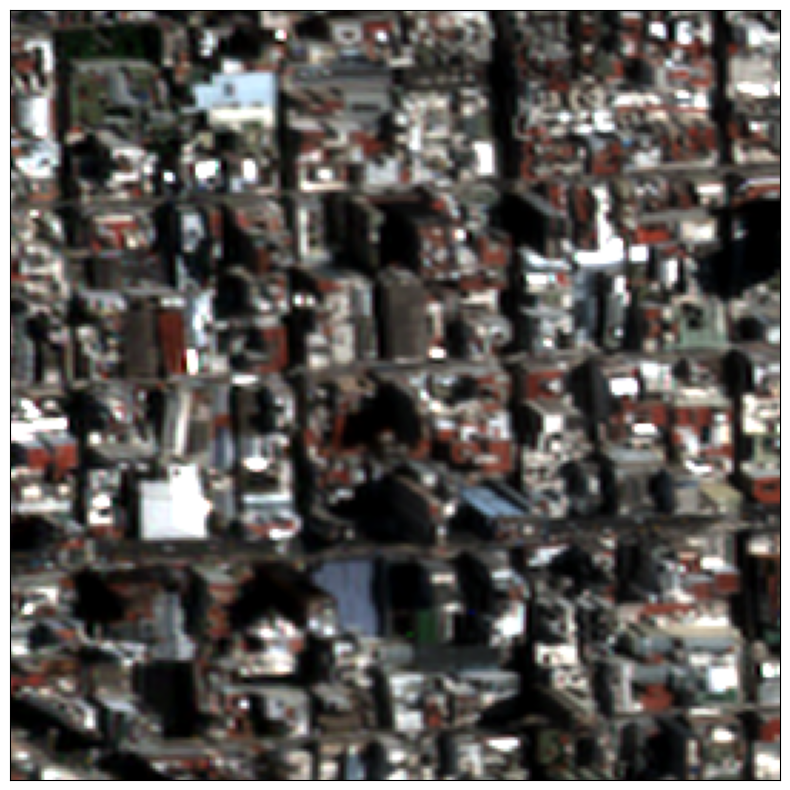

<Axes: >

In [59]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

ep.plot_rgb(subset.values,
            rgb=[0, 1, 2],
            stretch=True,)
